<a href="https://colab.research.google.com/github/ayanmmm/Assignment_5_6_7/blob/main/Copy_of_Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
import warnings
warnings.filterwarnings('ignore')

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [62]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

In [63]:
df.head(2)

,Chirps/Second,Ground Temperature
0,20.0,88.6
1,16.0,71.6


In [64]:
x = df['Ground Temperature']
x = x.to_frame()
y = df['Chirps/Second']
y= y.to_frame()

In [65]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [68]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [69]:
model.predict(x_test)

array([[16.89797702],
       [17.45573565],
       [16.28444252],
       [16.07993102],
       [19.44507479]])

In [70]:
from sklearn.metrics import  r2_score

# Compute y_pred
y_pred = model.predict(x_test)

# Compute mse_dt
rsquared = r2_score(y_test,y_pred)
# Compute rmse_dt


# Print rmse_dt
print("Test set R2 of df: {:.2f}".format(rsquared))

Test set R2 of df: 0.60


In [71]:
c=model.intercept_
m=model.coef_

In [72]:
#Task-1> Find the linear regression equation for this data.
print('The Linear Equation is: y= ',m,'x+',c)

The Linear Equation is: y=  [[0.18591955]] x+ [2.09878121]


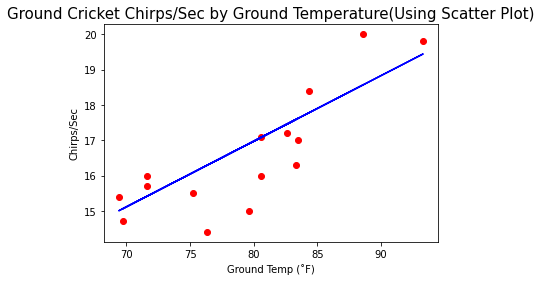

In [73]:
#Task-2> Chart the original data and the equation on the chart.
plt.scatter(x,y,color="r")
plt.plot(x, model.predict(x),color='b')
plt.title('Ground Cricket Chirps/Sec by Ground Temperature(Using Scatter Plot)',fontsize=15)
plt.xlabel('Ground Temp (˚F)')
plt.ylabel('Chirps/Sec')
plt.show()

In [15]:
model.predict([[18]])

array([[4.61402331]])

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns

In [75]:
df = pd.read_fwf("/content/brain_body.txt")

In [76]:
df.head(2)

,Brain,Body
0,3.385,44.5
1,0.480,15.5


In [77]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [78]:
df.dtypes

Brain    float64
Body     float64
dtype: object

In [79]:
df.shape

(62, 2)

In [80]:
def plotvariable(df,variable):
  plt.figure(figsize=(16,4))
  #histogram
  plt.subplot(1,2,1)
  plt.hist(df[variable],alpha=0.5)

  #boxplot
  plt.subplot(1,2,2)
  sns.boxplot(df[variable])

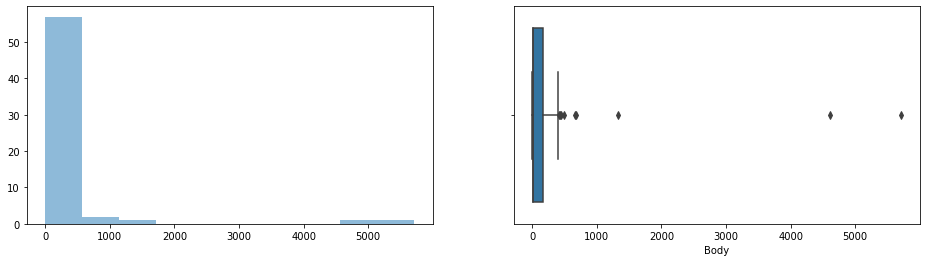

In [81]:
plotvariable(df,'Body')

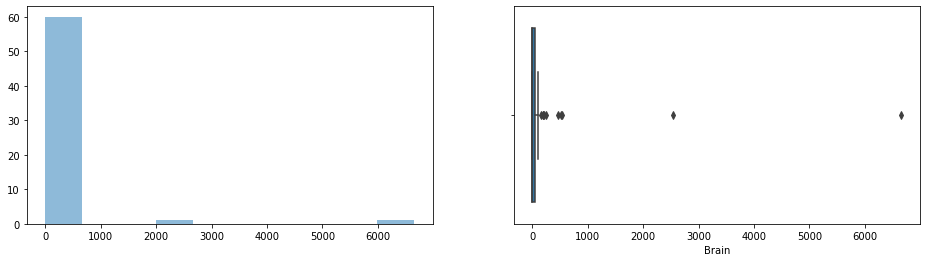

In [82]:
plotvariable(df,'Brain')

In [83]:
def find_boundaries(df,variable):

  Q1=df[variable].quantile(.25)
  Q3=df[variable].quantile(.75)
  IQR=Q3-Q1
  lower_boundy=Q1-1.5*IQR
  upper_boundy=Q3+1.5*IQR

  return lower_boundy,upper_boundy

In [84]:
#limit for BODY level=1
lower_boundy,upper_boundy=find_boundaries(df,'Body')
print('upper limit is',upper_boundy)
print('lower limit is',lower_boundy)

upper limit is 408.625
lower limit is -238.375


In [85]:
#limit for Brain, Level =1
lower_boundy,upper_boundy=find_boundaries(df,'Brain')
print('upper limit is',upper_boundy)
print('lower limit is',lower_boundy)

upper limit is 119.60625
lower limit is -70.80375000000001


In [86]:
#trimming
df=df[(df['Body'] >-238.37) & (df['Body'] < 408.62)]

In [87]:
df=df[(df['Brain'] >-70.80) & (df['Brain'] < 119.60)]

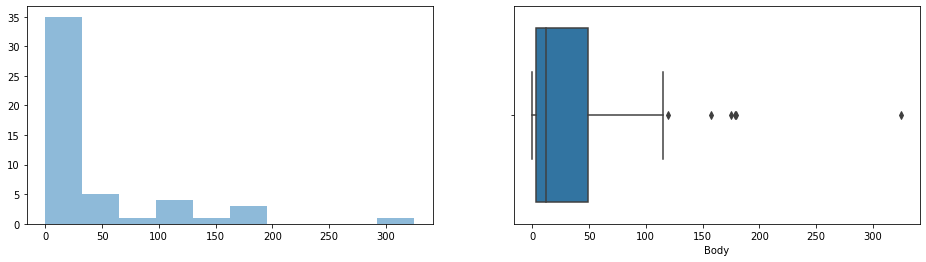

In [88]:
plotvariable(df,'Body')

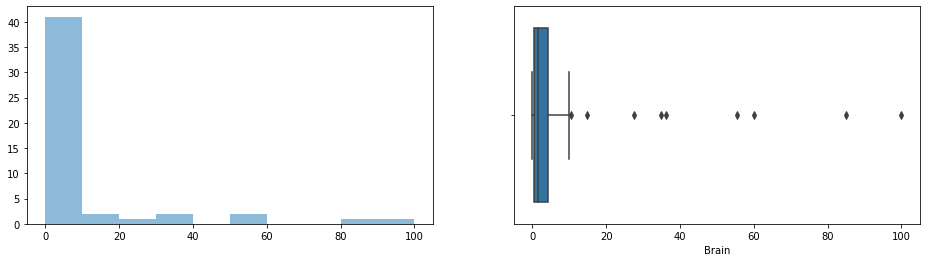

In [89]:
plotvariable(df,'Brain')

In [90]:
#limit for Body, Level = 2
lower_boundy,upper_boundy=find_boundaries(df,'Body')
print('upper limit is',upper_boundy)
print('lower limit is',lower_boundy)

upper limit is 117.62499999999999
lower limit is -65.57499999999999


In [91]:
#limit for Brain, Level = 2
lower_boundy,upper_boundy=find_boundaries(df,'Brain')
print('upper limit is',upper_boundy)
print('lower limit is',lower_boundy)

upper limit is 10.085
lower limit is -5.545000000000001


In [92]:
#trimming Brain >>2
df=df[(df['Brain'] >-5.54) & (df['Brain'] < 10.085)]


In [93]:
df=df[(df['Body'] >-5.56) & (df['Body'] < 11.93)]

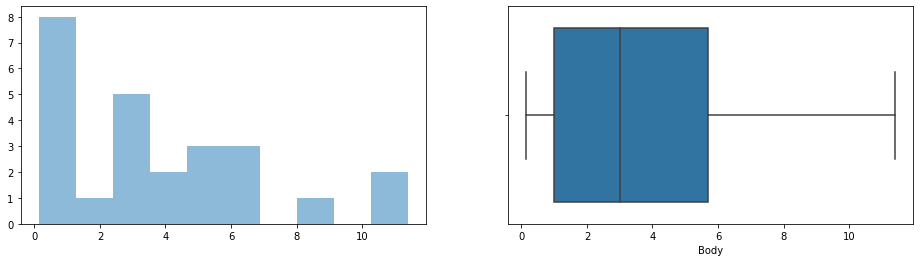

In [94]:
plotvariable(df,'Body')
# outliers from Body is completely removed

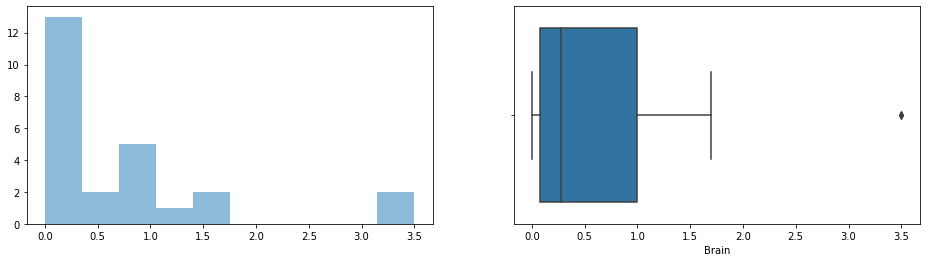

In [95]:
plotvariable(df,'Brain')

In [96]:
lower_boundy,upper_boundy=find_boundaries(df,'Brain')
print('upper limit is',upper_boundy)
print('lower limit is',lower_boundy)

upper limit is 2.3875
lower limit is -1.3125000000000002


In [97]:
#trimming
df=df[(df['Brain'] >-1.19) & (df['Brain'] < 2.17)]

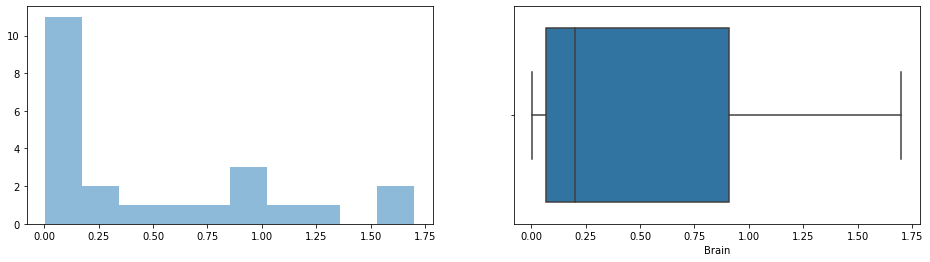

In [98]:
plotvariable(df,'Brain')
#outliers from Brain is completly removed

In [99]:
x=df["Brain"]
x=x.to_frame()
y=df["Body"]
y=y.to_frame()

In [100]:
from sklearn.model_selection import train_test_split

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [102]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [103]:
model.predict(x_test)

array([[2.42269229],
       [1.54897433],
       [7.46916676],
       [4.32453528],
       [5.13423081],
       [2.12141024],
       [1.82012818]])

In [104]:
from sklearn.metrics import  r2_score

# Compute y_pred
y_pred = model.predict(x_test)

# Compute mse_dt
rsquared = r2_score(y_test,y_pred)
# Compute rmse_dt


# Print rmse_dt
print("Test set R2 of df: {:.2f}".format(rsquared))

Test set R2 of df: 0.67


In [47]:
#3.Find the equation's  R2  score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

#here R2 score is less then 0.8,

In [105]:
c=model.intercept_
m=model.coef_

In [106]:
#1. Find the linear regression equation for this data for brain weight to body weight.
print('The Linear Equation is: y= ',m,'x+',c)

The Linear Equation is: y=  [[3.76602572]] x+ [1.36820509]


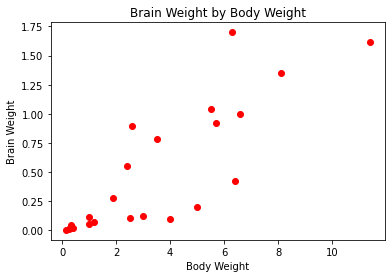

In [109]:
#2.Chart the original data and the equation on the chart.
plt.scatter(y, x, color='red')
plt.title('Brain Weight by Body Weight')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.show()

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [110]:
df = pd.read_fwf("/content/salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [111]:
df.head(2)

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350


In [112]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [113]:
df.duplicated().sum()

0

In [114]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [115]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [116]:
def outlier_presence(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    print("Interquartile Range of " + i + " is", IQR)
    print("Lower Limit ", lower_limit)
    print("Upper Limit ", upper_limit)
    outliers = df[(df[i]<lower_limit)|(df[i]>upper_limit)]
    if outliers.shape[0] != 0:
      print("Outlier is Presented In",i )
      print("\n")
    else:
      print("Outlier is Not Presented In",i )
      print("\n")
  
outlier_presence(df)

Interquartile Range of Sex is 1.0
Lower Limit  -1.5
Upper Limit  2.5
Outlier is Not Presented In Sex


Interquartile Range of Rank is 2.0
Lower Limit  -2.0
Upper Limit  6.0
Outlier is Not Presented In Rank


Interquartile Range of Year is 8.0
Lower Limit  -9.0
Upper Limit  23.0
Outlier is Presented In Year


Interquartile Range of Degree is 1.0
Lower Limit  -1.5
Upper Limit  2.5
Outlier is Not Presented In Degree


Interquartile Range of YSdeg is 16.5
Lower Limit  -18.0
Upper Limit  48.0
Outlier is Not Presented In YSdeg


Interquartile Range of Salary is 9011.75
Lower Limit  4729.125
Upper Limit  40776.125
Outlier is Not Presented In Salary




In [ ]:
#Outlier is Presented In Year

In [117]:
lower_limit =  -9.0
upper_limit =  23.0

In [118]:
df['Year'] = np.where(
    df['Year']>upper_limit,
    upper_limit,
    np.where(
        df['Year']<lower_limit,
        lower_limit,
        df['Year']
    ) 
)
df['Year'].describe()

count    52.000000
mean      7.442308
std       5.388490
min       0.000000
25%       3.000000
50%       7.000000
75%      11.000000
max      23.000000
Name: Year, dtype: float64

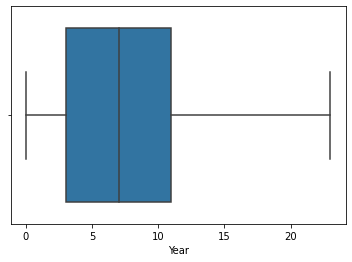

In [119]:
sns.boxplot(df['Year'])

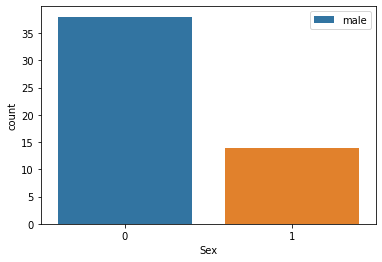

In [120]:
sns.countplot(df['Sex'])
plt.legend(labels=['male','female'])

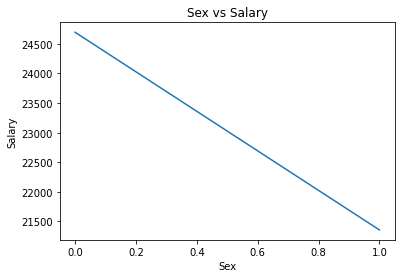

In [121]:
df.groupby('Sex')['Salary'].mean().plot()
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

In [122]:
#There is linear relationship in between sex and salary columns.

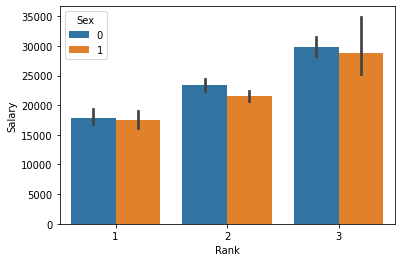

In [123]:
sns.barplot(df["Rank"],df["Salary"],hue=df["Sex"])

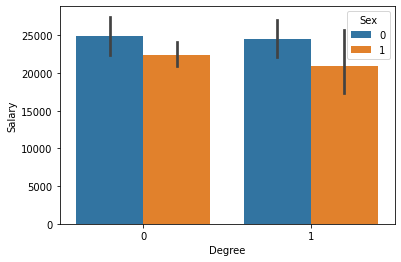

In [124]:
sns.barplot(df["Degree"],df["Salary"],hue=df["Sex"])

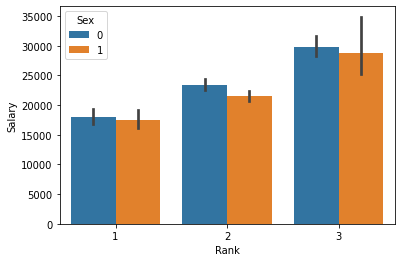

In [125]:
sns.barplot(df["Rank"],df["Salary"],hue=df["Sex"])

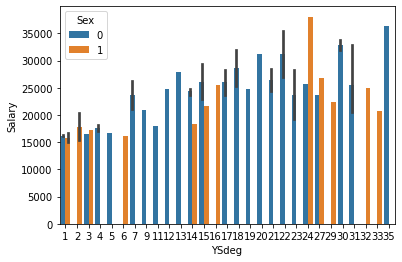

In [126]:
sns.barplot(df["YSdeg"],df["Salary"],hue=df["Sex"])

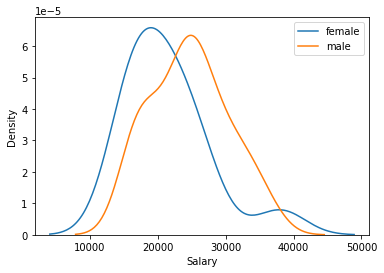

In [127]:
sns.distplot(df[df["Sex"]==1]["Salary"],df["Year"],hist=False,)
sns.distplot(df[df["Sex"]==0]["Salary"],df["Year"],hist=False,)
plt.legend(labels=['female', 'male'])

In [128]:
#task 1. Find the linear regression equation for this data using columns 1-5 to column 6.

In [129]:
X = df[['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']].values 
y = df['Salary'].values

In [130]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [131]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
scaler.fit(X_train,y_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

In [132]:
scaler.var_

array([ 0.19631172,  0.68054729, 23.31945271,  0.2379536 , 95.37656157])

In [133]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [134]:
y_pred = regressor.predict(X_test) # given the features of the test dataset, it will give the final predictions
y_pred

array([20676.01536984, 16403.62775318, 28450.70782901, 28680.45836245,
       29431.63477854, 16748.26767008, 34354.18749419, 22542.63044185,
       25020.64154736, 27211.70227625, 42520.25048426])

In [135]:
m=regressor.coef_
c=regressor.intercept_
y=regressor.predict([[1,3,7,1,27]]) #y=mx+c
print('y=',y)

y= [7668.20260449]


In [136]:
coeff_df = pd.DataFrame(regressor.coef_,['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Sex,497.681418
Rank,5132.680926
Year,2205.496616
Degree,-1105.096677
YSdeg,-1722.251084


In [137]:
regressor.intercept_

23939.878048780487

In [138]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df2

,Actual,Predicted
0,28200,28749.855483
1,24450,29541.135636
2,16244,16075.530415
3,36350,32570.976213
4,15350,17479.152265
5,25748,28116.788369
6,24742,26837.384739
7,16150,16773.751986
8,20300,16565.718178
9,16500,16179.547319


In [139]:
from sklearn import metrics
print('R2 SCORE:', metrics.r2_score(y_test,y_pred))

R2 SCORE: 0.8597694072221109


In [140]:
#The evaluation metric R2 square value of linear regresssion is 85.97

In [141]:
#Report whether sex is a factor in salary.

#there is less number of female employee compare to male, 
#As compared to "Rank and Year" ,"Sex" having less feature importance.

#Sex Is Not a Factor for Salary
